In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os

### Load scalability data

In [2]:
project_path = os.path.dirname(os.getcwd())
project_path

'c:\\Users\\pierp\\OneDrive\\Desktop\\Optimization Models\\Python exercises\\DSSC_MO'

In [3]:
backup = project_path + '\\backup\\wfa_scalability.pkl'
print(backup)

with open(backup, 'rb') as file:
    scalability = pickle.load(file)
scalability

c:\Users\pierp\OneDrive\Desktop\Optimization Models\Python exercises\DSSC_MO\backup\wfa_scalability.pkl


[[5, 5, 2, 0, 0.07778710004640743, 157.07385040004738],
 [5, 5, 2, 1, 0.06830430001718923, 162.52555249998113],
 [5, 5, 2, 2, 0.10679570003412664, 169.37294640002074],
 [5, 5, 2, 3, 0.09493920003296807, 138.9745170000242],
 [5, 5, 2, 4, 0.06630940001923591, 273.08731249999255],
 [5, 6, 3, 0, 0.10634220001520589, 1259.356039800041],
 [5, 6, 3, 1, 0.08726790000218898, 586.8589019000065],
 [5, 6, 3, 2, 0.08513309998670593, 791.8992571000126],
 [5, 6, 3, 3, 0.0796583000337705, 1041.449422399979],
 [5, 6, 3, 4, 0.10914099996443838, 385.6848009999958],
 [5, 7, 4, 0, 0.11313249997328967, 805.7376557000098],
 [5, 7, 4, 1, 0.10437180002918467, 329.49967280001147],
 [5, 7, 4, 2, 0.10125669999979436, 3310.5727261999855],
 [5, 7, 4, 3, 0.11284139996860176, 1099.1227480000234],
 [5, 7, 4, 4, 0.10636149998754263, 1826.769266200019],
 [5, 5, 2, 5, 0.05723470001248643, 320.49575859995093],
 [5, 5, 2, 6, 0.04477069998392835, 322.65361729997676],
 [5, 5, 2, 7, 0.043749400007072836, 204.41295840003295],


In [6]:
columns = ['fields', 'storages', 'vehicles', 'iter', 'build_time', 'opt_time']
df_scalability = pd.DataFrame(scalability, columns=columns)
df_scalability = df_scalability.sort_values(by=['fields', 'storages', 'iter'], ascending=[True, True, True])  
df_scalability

,fields,storages,vehicles,iter,build_time,opt_time
0,5,5,2,0,0.077787,157.073850
1,5,5,2,1,0.068304,162.525552
2,5,5,2,2,0.106796,169.372946
3,5,5,2,3,0.094939,138.974517
4,5,5,2,4,0.066309,273.087312
15,5,5,2,5,0.057235,320.495759
16,5,5,2,6,0.044771,322.653617
17,5,5,2,7,0.043749,204.412958
18,5,5,2,8,0.050290,177.594593
19,5,5,2,9,0.078866,235.808691


Some iterations seem blocked or return an optimization runtime which is way far from the other iterations for the same set of [n. fields, n. storages, n. vehichels]; these runs are outiliers and they will not considered for the scalabiltiy analisys.

In [ ]:
# df_scalability = df_scalability.drop([30, 31, 37]) # remove outliers

###  Group iterations 

group by: 'fields', 'storages' and 'vehicles' and compute mean and standard deviation

In [7]:
df = df_scalability.groupby(['fields', 'storages', 'vehicles'], group_keys=True).agg({'build_time':['mean','std'], 'opt_time':['mean', 'std']})
print(df)

                         build_time               opt_time             
                               mean       std         mean          std
fields storages vehicles                                               
5      5        2          0.068905  0.021073   216.199980    68.307599
       6        3          0.090081  0.016443   776.307575   322.045062
       7        4          0.096359  0.012323  1566.150620  1547.678222


### Produce Visualization

In [8]:
path = project_path + '\\images\\'
foot = '5_fields_'

In [9]:
path

'c:\\Users\\pierp\\OneDrive\\Desktop\\Optimization Models\\Python exercises\\DSSC_MO\\images\\'

##### Plot Buid runtime

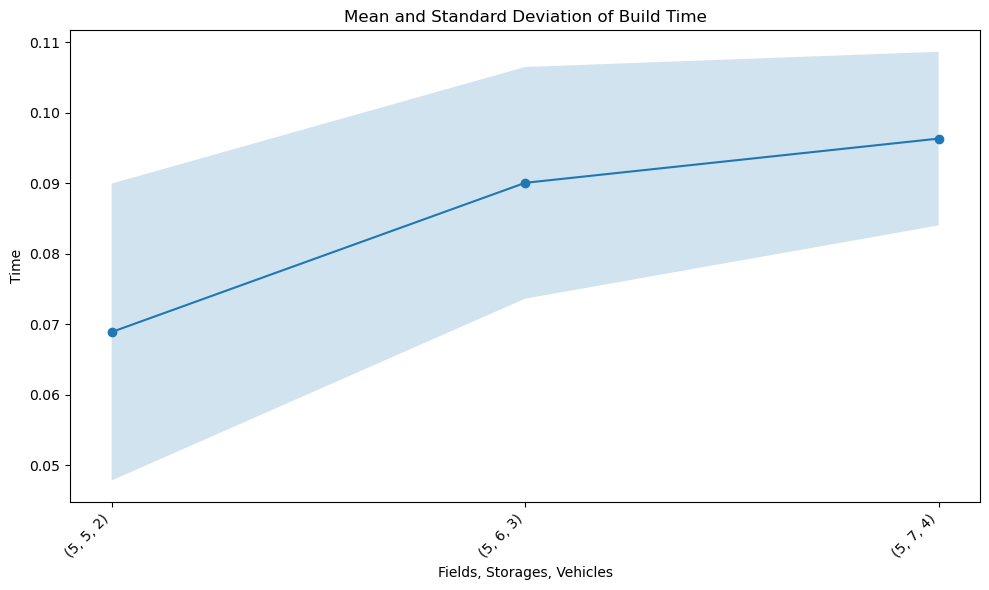

In [10]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot build_time
df['build_time']['mean'].plot(ax=ax, marker='o', label='build_time mean')
ax.fill_between(
    range(len(df)),
    df['build_time']['mean'] - df['build_time']['std'],
    df['build_time']['mean'] + df['build_time']['std'],
    alpha=0.2
)

# Customize the plot
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Build Time')

plt.savefig(path + f'{foot}build_time.svg', format='svg')
plt.tight_layout()
plt.show()

##### Plot Optimiaziotion runtime

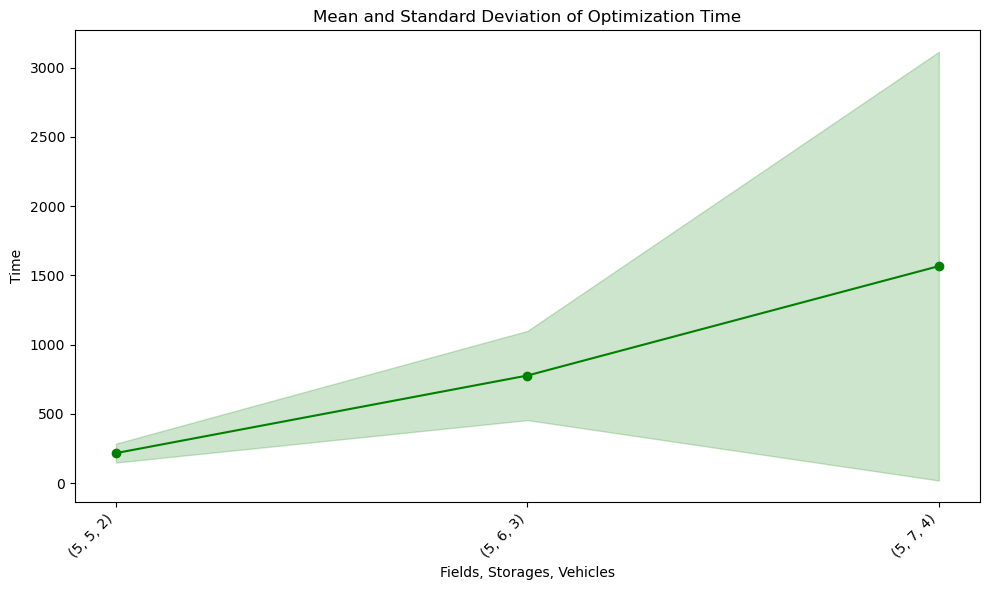

In [11]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot opt_time
df['opt_time']['mean'].plot(ax=ax, marker='o', color='green')
ax.fill_between(
    range(len(df)),
    df['opt_time']['mean'] - df['opt_time']['std'],
    df['opt_time']['mean'] + df['opt_time']['std'],
    alpha=0.2,
    color='green'
)

# Customize the plot
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Optimization Time')

plt.savefig(path + f'{foot}opt_time.svg', format='svg')
plt.tight_layout()
plt.show()

##### Plot Total runtime (Build + Optimization)

In [12]:
# Group by the first level of the multi-index and sum
tot_time = {
 'mean_time': df.loc[:,'build_time']['mean'] + df.loc[:,'opt_time']['mean'],
 'std_time': df.loc[:,'build_time']['std'] + df.loc[:,'opt_time']['std']
}

tot_time = pd.DataFrame(tot_time)
print(tot_time) 

                            mean_time     std_time
fields storages vehicles                          
5      5        2          216.268884    68.328672
       6        3          776.397656   322.061505
       7        4         1566.246979  1547.690545


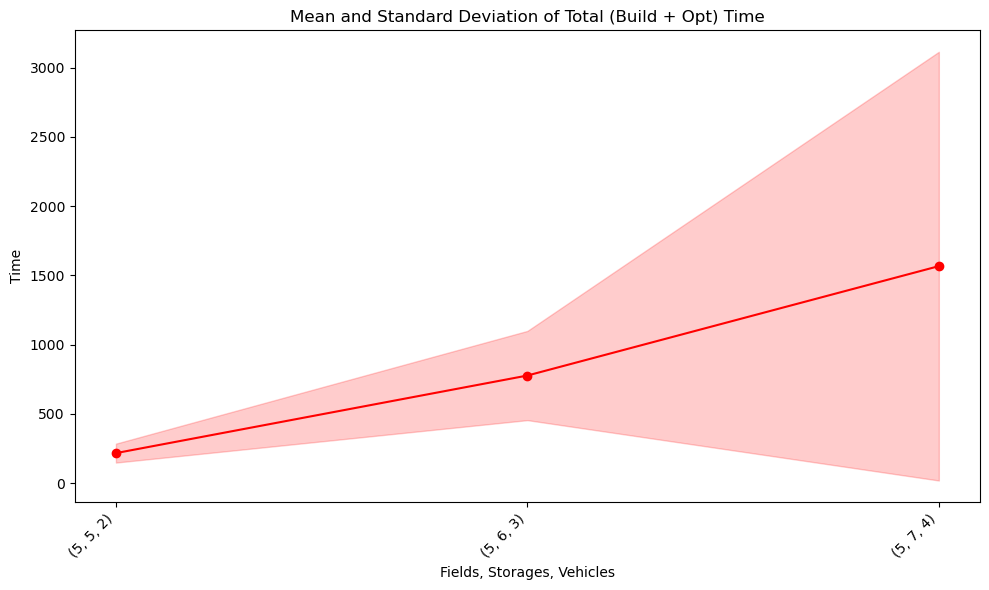

In [13]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot tot_time
tot_time['mean_time'].plot(ax=ax, marker='o', color='red')
ax.fill_between(
    range(len(tot_time)),
    tot_time['mean_time'] - tot_time['std_time'],
    tot_time['mean_time'] + tot_time['std_time'],
    alpha=0.2,
    color='red'
)

# Customize the plot
ax.set_xticks(range(len(tot_time)))
ax.set_xticklabels(tot_time.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Total (Build + Opt) Time')

plt.tight_layout()
plt.savefig(path + f'{foot}total_time.svg', format='svg')
plt.show()

##### Plot Total runtime (Build + Optimization) & only Optimization runtime

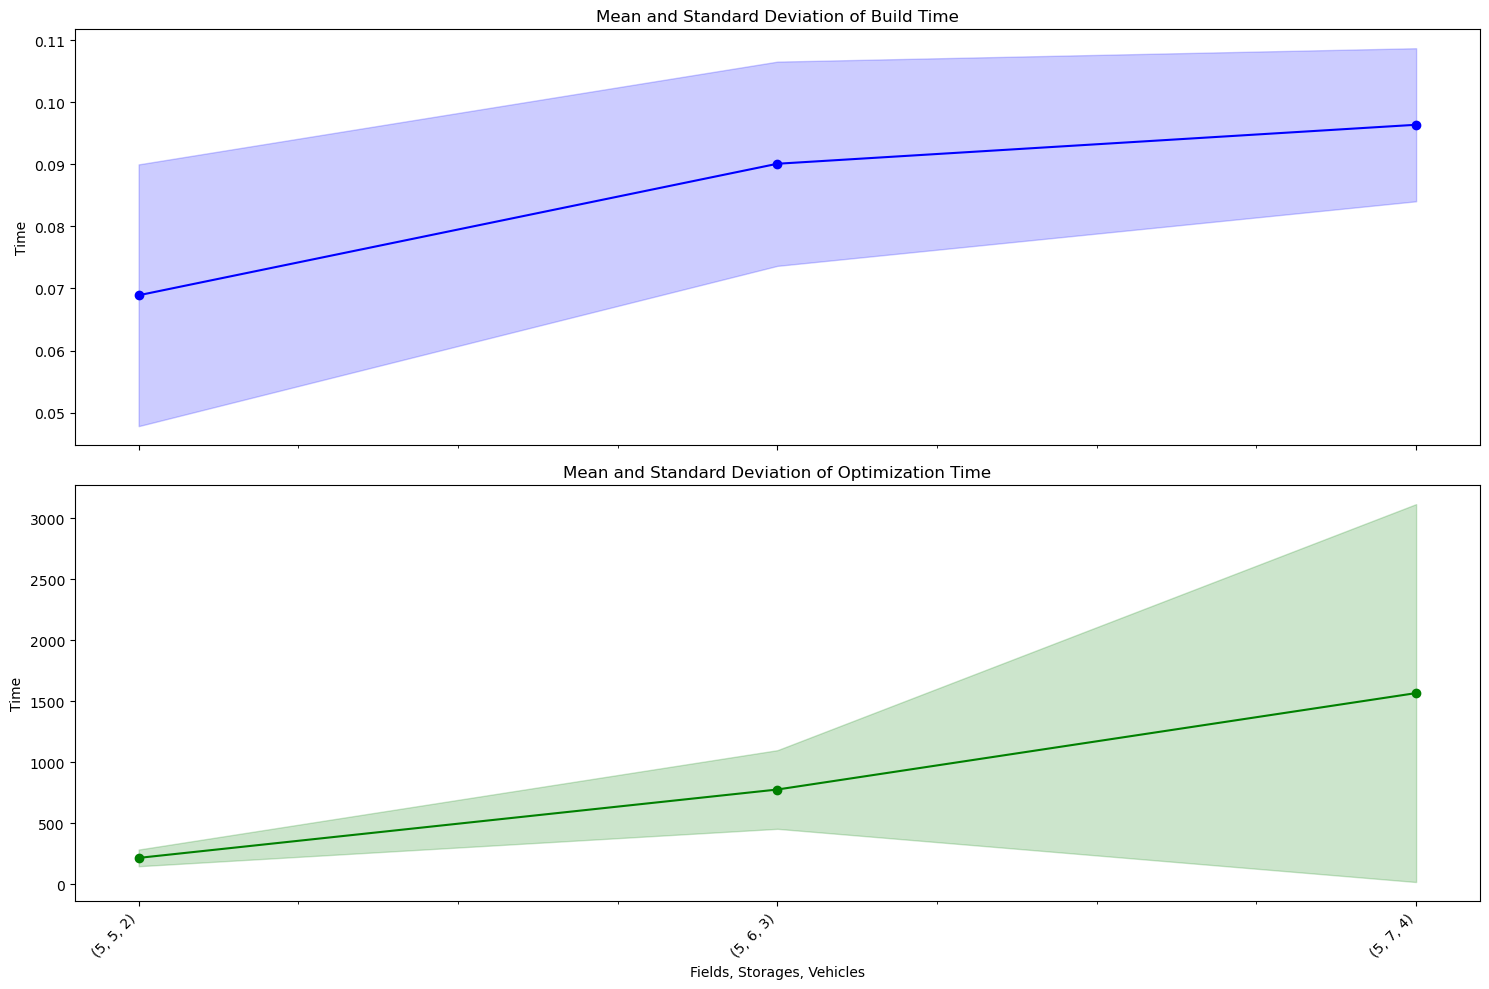

In [14]:
# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot build_time
df['build_time']['mean'].plot(ax=ax1, marker='o', label='build mean time', color='blue')
ax1.fill_between(
    range(len(tot_time)),
    df['build_time']['mean'] - df['build_time']['std'],
    df['build_time']['mean'] + df['build_time']['std'],
    alpha=0.2,
    color='blue'
)

ax1.set_xticks(range(len(df['build_time'])))
ax1.set_xticklabels(df['build_time'].index.tolist(), rotation=45, ha='right')

ax1.set_title('Mean and Standard Deviation of Build Time')
ax1.set_ylabel('Time')
ax1.set_xlabel('Fields, Storages, Vehicles')

# Plot opt_time
df['opt_time']['mean'].plot(ax=ax2, marker='o', label='opt mean time', color='green')
ax2.fill_between(
    range(len(df)),
    df['opt_time']['mean'] - df['opt_time']['std'],
    df['opt_time']['mean'] + df['opt_time']['std'],
    alpha=0.2,
    color='green'
)

ax2.set_xticks(range(len(df['opt_time'])))
ax2.set_xticklabels(df['opt_time'].index.tolist(), rotation=45, ha='right')

ax2.set_title('Mean and Standard Deviation of Optimization Time')
ax2.set_ylabel('Time')
ax2.set_xlabel('Fields, Storages, Vehicles')


plt.savefig(path + f'{foot}total_and_opt_time.svg', format='svg')
plt.tight_layout()
plt.show()